> **Redes Neuronales Convolucionales (CNN)**






Las redes neuronales convolucionales (CNN) son excelentes herramientas para crear clasificadores de imágenes.En las redes neuronales, la red neuronal convolucional (ConvNets o CNN) es una de las principales categorías para el reconocimiento de imágenes, las clasificaciones de imágenes, la detección de objetos, el reconocimiento de rostros, etc., son algunas de las áreas en las que las CNN se utilizan ampliamente.

**Fuente de la data:**  
El conjunto de datos CIFAR-10
El conjunto de datos CIFAR-10 contiene 60.000 imágenes RGB de 32 × 32x3 píxeles en 10 clases, lo que significa 6.000 por clase.  Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba (están contenidos en la libreria keras).

El conjunto de datos CIFAR-10 tiene 10 etiquetas diferentes:

* Avión

* Automóvil

* Pájaro

* Gato

* Ciervo

* Perro

* Rana

* Caballo

* Barco

* Camión




Validando que la GPU de Google esta activa.

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


importe todos los módulos y bibliotecas necesarios.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Se carga el conjunto de datos y se  divide en conjuntos de test y de train.

In [3]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
from tensorflow.keras.utils import to_categorical

se imprime shape de la muestra de train, y shape de la muestra de testy el número total de clases presentes en CIFAR-10. Hay 10 clases como se describio antes. Por ejemplo, se imprime dos imágenes de ejemplo del conjunto de train (1) y del conjunto de test (1).


In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : [6]')

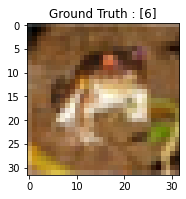

In [6]:
# Muestra imagen del onjunto de train 
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))


Text(0.5, 1.0, 'Ground Truth : [3]')

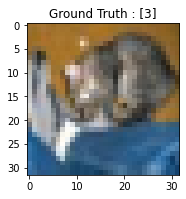

In [7]:
# Muestra imagen del conjunto de test 
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [8]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

In [9]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

Normalice los datos entre 0–1 dividiendo los datos del tren y los datos de prueba con 255 y luego convierta todas las etiquetas en un vector caliente con la función to_catagorical () .

In [10]:

#Escale los datos para que se encuentren entre 0 y 1

train_data /= 255
test_data /= 255

Muestre el cambio para la etiqueta de categoría usando codificación one-hot.

In [11]:
# Cambie las etiquetas de entero a datos categóricos 
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [12]:
# Muestre los cambios de etiquetas categóricas usando one-hot encoding 
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**creando el modelo**

Se Agrega capas de Convo seguidas de capas pooling . 

Luego se conecta la capa Densa (FC) para predecir las clases.

Los datos de entrada alimentan a la primera capa Convo, la salida de esa capa Convo actúa como entrada para la siguiente capa Convo y así sucesivamente. Finalmente, los datos se envían a la capa FC que intenta predecir las etiquetas correctas.


In [13]:
def createModel():
    model = Sequential()
    # Las primeras 2 capas con filtros de ventana de tamaño 3x3 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

**Compilación del modelo**

Se inicializa todos los parámetros y se  compila el modelo con rmsprops optimizer. Hay muchos optimizadores, por ejemplo :
* Adam 
* SGD, 
* Gradient Descent,
* Adagrad, 
* Adadelta 
*  Adamax. 


Con un  lote de 256 y 50 épocas.


In [14]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


**model.summary () :** Se usa para ver todos los parámetros y formas en cada capa en el modelo. Se observa que los parámetros totales son 276, 138 y los parámetros entrenables totales son 276, 138. El parámetro no entrenable es 0.

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

**Entrenamiento y Evaluación del modelo**

Después de compilar el modelo, se entrena el modelo mediante el método fit () y luego se evalua.

In [16]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 40s 44ms/step - loss: 2.0358 - accuracy: 0.2490 - val_loss: 1.9320 - val_accuracy: 0.2866
Epoch 2/50
196/196 [==============================] - 8s 40ms/step - loss: 1.7014 - accuracy: 0.3770 - val_loss: 1.7207 - val_accuracy: 0.3857
Epoch 3/50
196/196 [==============================] - 8s 40ms/step - loss: 1.5165 - accuracy: 0.4490 - val_loss: 1.5111 - val_accuracy: 0.4581
Epoch 4/50
196/196 [==============================] - 8s 40ms/step - loss: 1.3781 - accuracy: 0.5054 - val_loss: 1.3264 - val_accuracy: 0.5237
Epoch 5/50
196/196 [==============================] - 8s 40ms/step - loss: 1.2719 - accuracy: 0.5449 - val_loss: 1.2458 - val_accuracy: 0.5602
Epoch 6/50
196/196 [==============================] - 8s 40ms/step - loss: 1.1921 - accuracy: 0.5751 - val_loss: 1.2915 - val_accuracy: 0.5595
Epoch 7/50
196/196 [==============================] - 8s 40ms/step - loss: 1.1201 - accuracy: 0.6024 - val_loss: 1.0318 - val_accuracy: 0.632

[0.6734617948532104, 0.7914000153541565]

Después de entrenar el modelo, se obtiene un 83,37 % de accuracy/Exactitud y un 79,14 % de validation accuracy. 



Text(0.5, 1.0, 'Loss Curves')

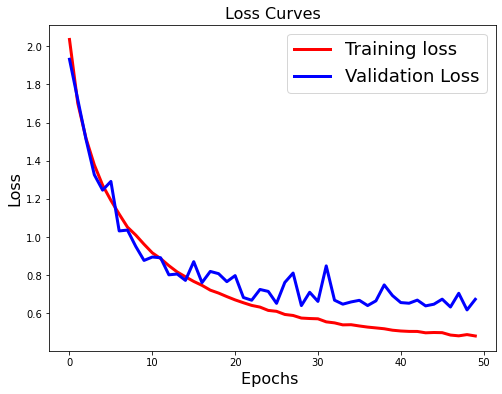

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)